In [1]:
import os
import pickle
import numpy as np
from pandas.io.parsers import read_csv
from matplotlib import pyplot, pyplot as plt, gridspec

In [2]:
print("Loading data...")
test_file = './Data/test.p'
training_file = './Data/train.p'

sign_names = read_csv("./Data/signname.csv").values[:, 1]

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
X_train, y_train = train['features'], train['labels']

with open(test_file, mode='rb') as f:
    test = pickle.load(f)
X_test, y_test = test['features'], test['labels']

Loading data...


In [3]:
print("Step 2")
print("Basic analysis of the training dataset")
n_train = X_train.shape[0]
image_shape = X_train[0].shape
classes, class_indices, class_counts = np.unique(y_train, return_index=True, return_counts=True)
n_classes = len(class_counts)
print("Number of training examples =", n_train)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Step 2
Basic analysis of the training dataset
Number of training examples = 34799
Image data shape = (32, 32, 3)
Number of classes = 43


Step 3
Showing example images for classes 0-14 from the training dataset
0 . Class :  Speed limit (20km/h)


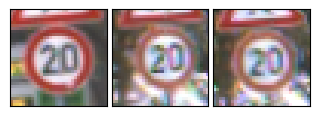

1 . Class :  Speed limit (30km/h)


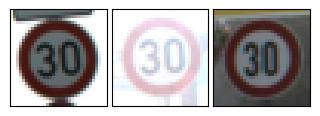

2 . Class :  Speed limit (50km/h)


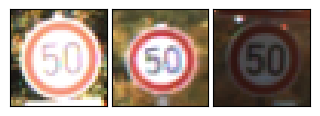

3 . Class :  Speed limit (60km/h)


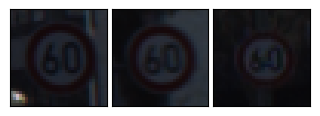

4 . Class :  Speed limit (70km/h)


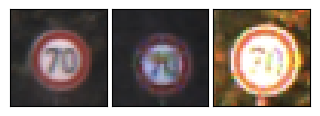

5 . Class :  Speed limit (80km/h)


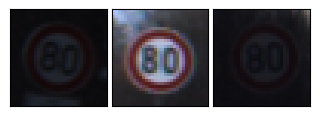

6 . Class :  End of speed limit (80km/h)


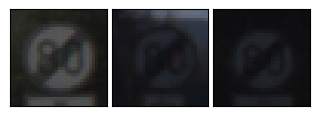

7 . Class :  Speed limit (100km/h)


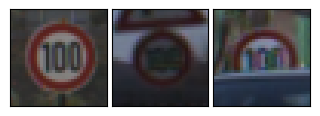

8 . Class :  Speed limit (120km/h)


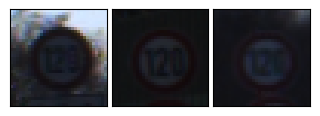

9 . Class :  No passing


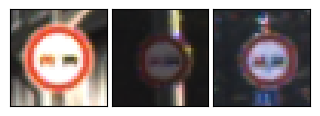

10 . Class :  No passing for vehicles over 3.5 metric tons


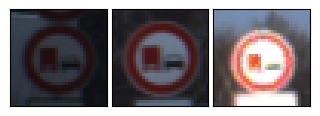

11 . Class :  Right-of-way at the next intersection


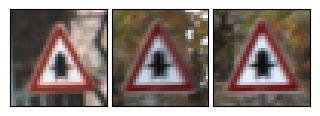

12 . Class :  Priority road


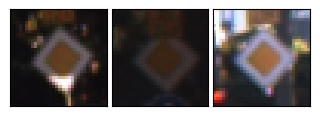

13 . Class :  Yield


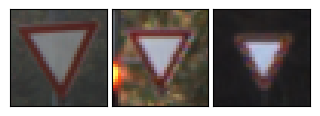

14 . Class :  Stop


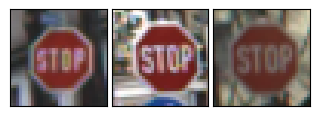

15 . Class :  No vehicles


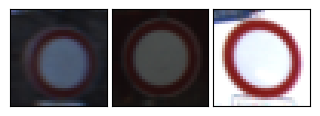

16 . Class :  Vehicles over 3.5 metric tons prohibited


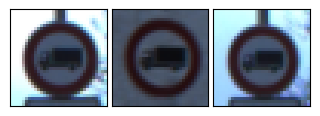

17 . Class :  No entry


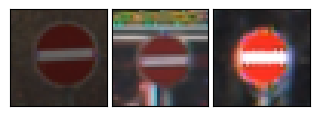

18 . Class :  General caution


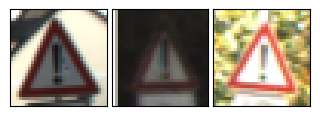

19 . Class :  Dangerous curve to the left


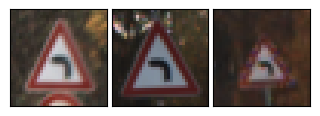

20 . Class :  Dangerous curve to the right


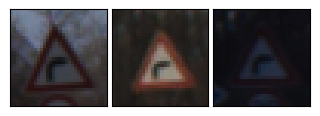

21 . Class :  Double curve


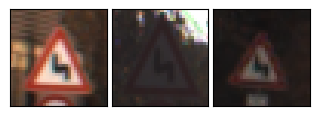

22 . Class :  Bumpy road


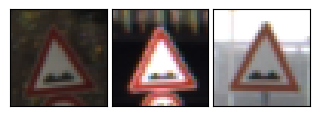

23 . Class :  Slippery road


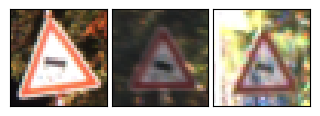

24 . Class :  Road narrows on the right


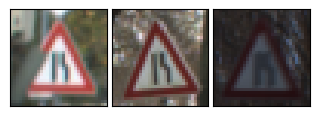

25 . Class :  Road work


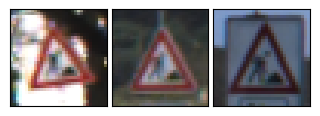

26 . Class :  Traffic signals


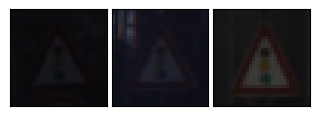

27 . Class :  Pedestrians


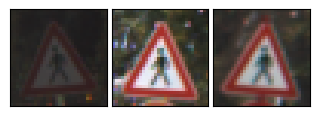

28 . Class :  Children crossing


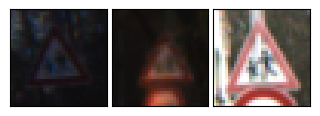

29 . Class :  Bicycles crossing


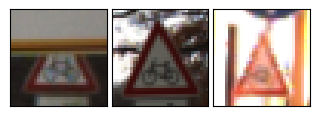

30 . Class :  Beware of ice/snow


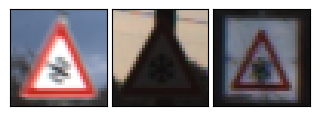

31 . Class :  Wild animals crossing


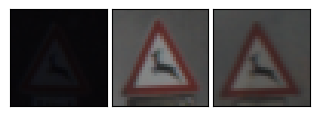

32 . Class :  End of all speed and passing limits


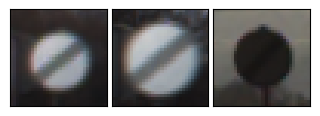

33 . Class :  Turn right ahead


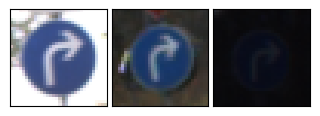

34 . Class :  Turn left ahead


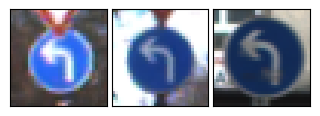

35 . Class :  Ahead only


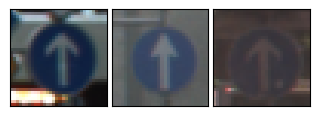

36 . Class :  Go straight or right


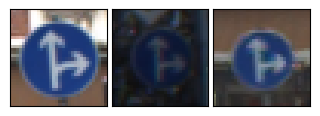

37 . Class :  Go straight or left


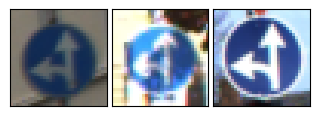

38 . Class :  Keep right


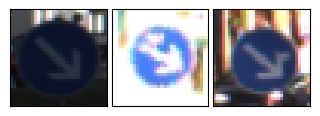

39 . Class :  Keep left


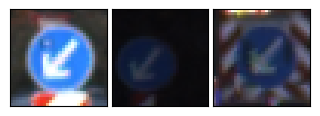

40 . Class :  Roundabout mandatory


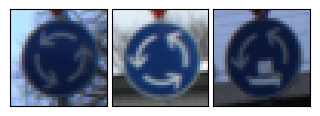

41 . Class :  End of no passing


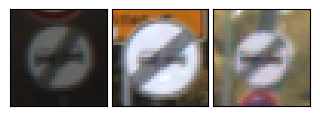

42 . Class :  End of no passing by vehicles over 3.5 metric


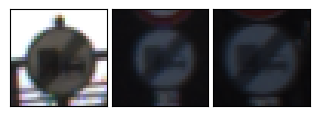

In [4]:
print("Step 3")
print("Showing example images for classes 0-14 from the training dataset")
# Visualizations of image datasets for each class
for c, c_i, c_count in zip(classes, class_indices, class_counts):
    print(c, ". Class : ", sign_names[c])
    fig = pyplot.figure(figsize=(3, 1))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
    for i in range(3):
        axis = fig.add_subplot(1, 3, i + 1, xticks=[], yticks=[])
        random_indices = np.random.randint(c_i, c_i + c_count, 10)
        axis.imshow(X_train[random_indices[i], :, :, :])
        # axis.text(0, 0, '{}: {}'.format(c, sign_names[c]), color='k',backgroundcolor='c', fontsize=8)   
    if not os.path.exists('./Images/'):
        os.mkdir('./Images/')
    pyplot.savefig('./Images/01_example_images_class_' + str(c) + '.png')
    pyplot.show()

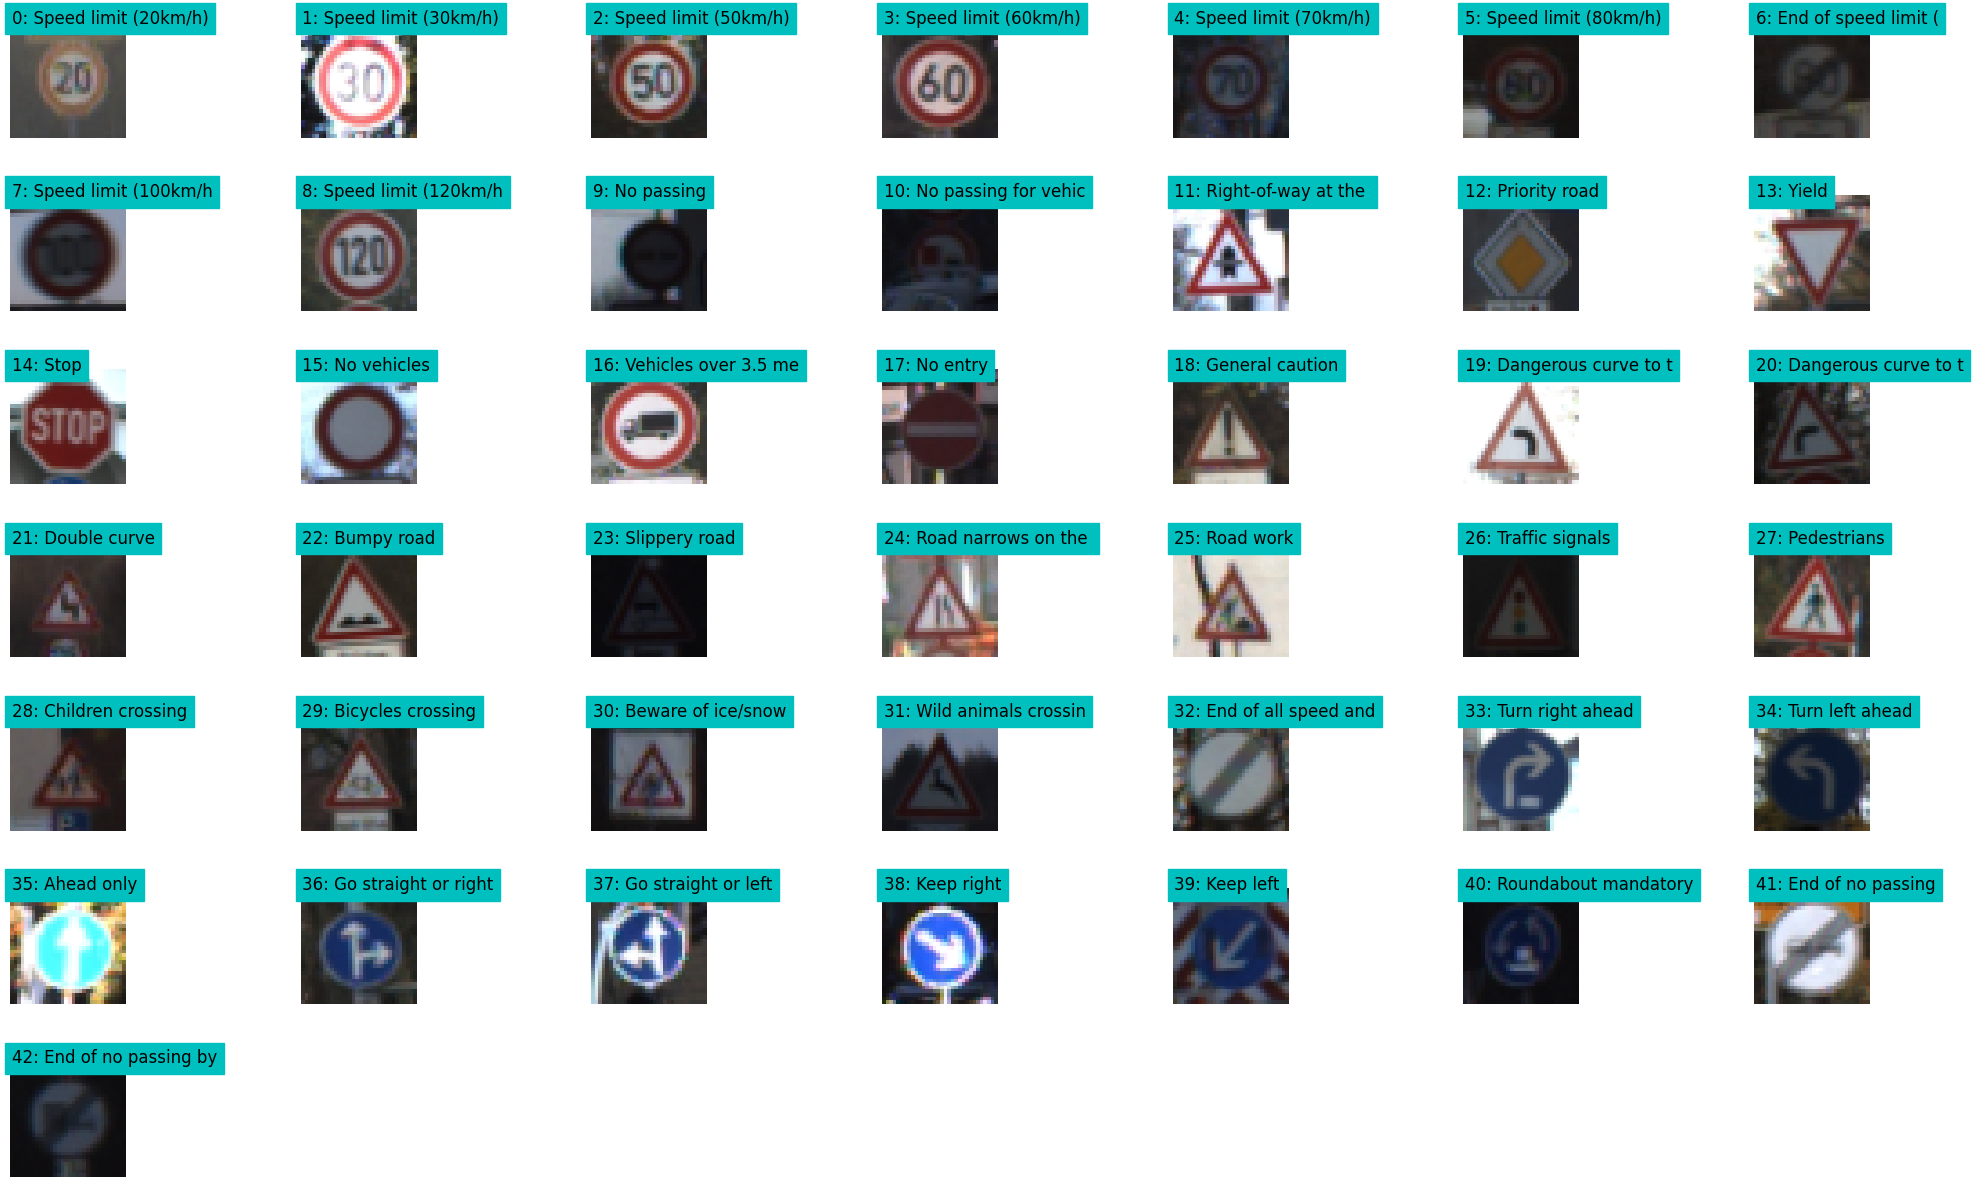

In [5]:
n_row = 7
plt.figure(figsize = (25,15))
gs1 = gridspec.GridSpec(n_row,n_row)
gs1.update(wspace=0.5, hspace=0.5) # set the spacing between axes.

for c, c_i, c_count in zip(classes, class_indices, class_counts):
    # i = i + 1 # grid spec indexes from 0
    ax1 = plt.subplot(gs1[c])
    plt.axis('on')
    ax1.set_xticklabels([])
    ax1.set_yticklabels([])
    ax1.set_aspect('equal')
    #plt.subplot(4,11,i+1)
    ind_plot = np.random.randint(c_i, c_i+c_count)
    plt.imshow(X_train[ind_plot])
    #plt.text(2,4,str(y[ind_plot]),color='k',backgroundcolor='c', fontsize=15)
    plt.text(0, 0, '{}: {:.20}'.format(c, sign_names[c]), color='k',backgroundcolor='c', fontsize=12)

    plt.axis('off')
plt.savefig('./Images/00_overview.png')
plt.show()

In [6]:
def make_plt(y_train, x_label, y_label, title):
    plt.figure(0, figsize=(20, 5))
    unique_train, counts_train = np.unique(y_train, return_counts=True)
    plt.bar(unique_train, counts_train)

    plt.title(title, fontsize=22)
    plt.xlabel(x_label, fontsize=20)
    plt.ylabel(y_label, fontsize=20)
    plt.tick_params(labelsize=16)
    plt.grid(linestyle=':')
    return plt

Step 4.1
Comparing occurences of each class in the training dataset


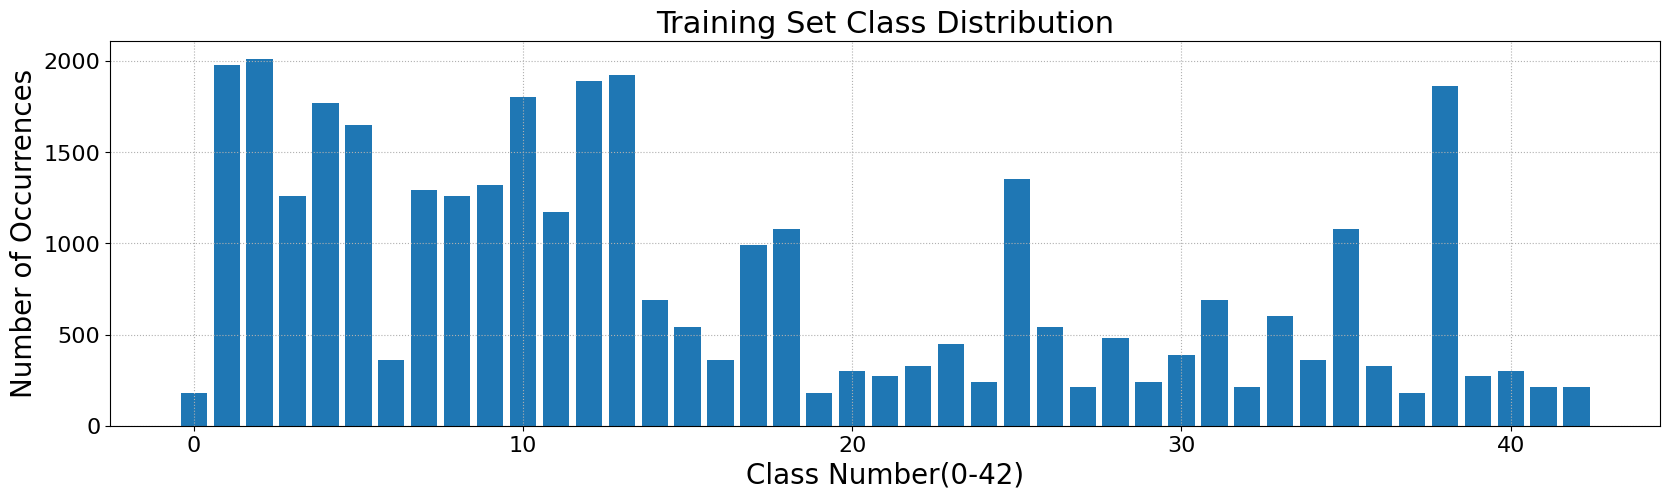

In [7]:
print("Step 4.1")
print("Comparing occurences of each class in the training dataset")
# Plot to show frequencies of data for Training dataset
plt = make_plt(y_train, 'Class Number(0-42)', 'Number of Occurrences', 'Training Set Class Distribution')
plt.savefig('./Images/02_graph_distribution_train.png')
plt.show()

Step 4.2
Comparing occurences of each class in the test dataset


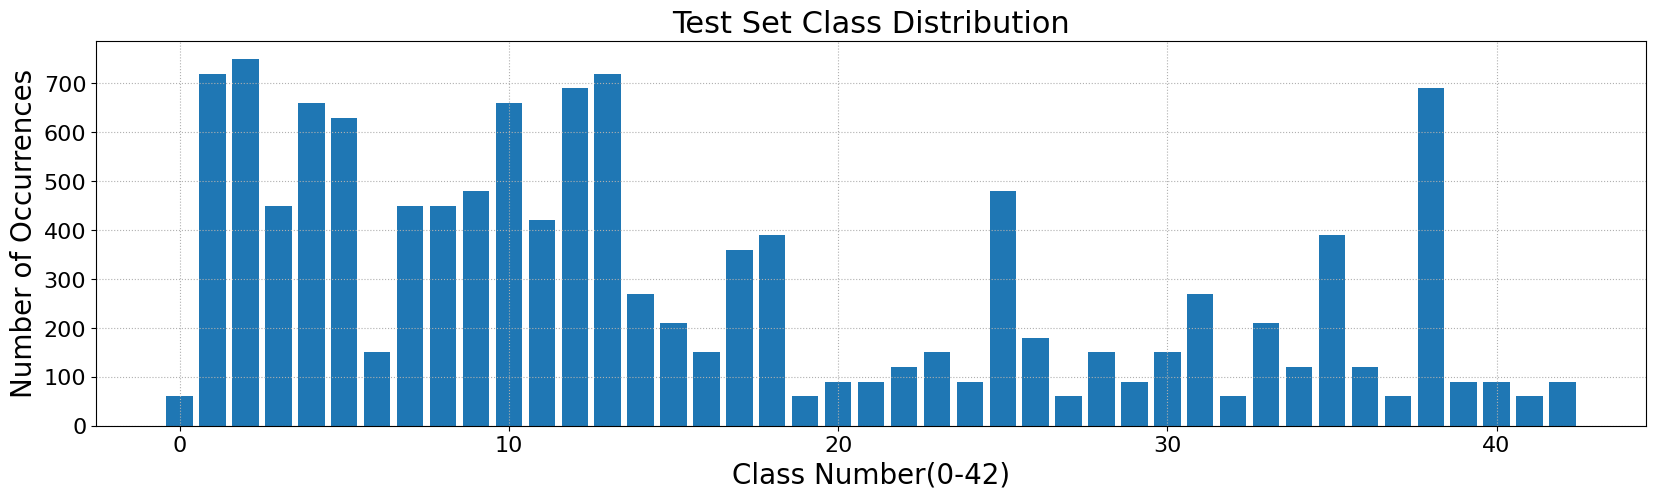

In [8]:
print("Step 4.2")
print("Comparing occurences of each class in the test dataset")
# Plot to show frequencies of data for Test dataset
plt = make_plt(y_test, 'Class Number(0-42)', 'Number of Occurrences', 'Test Set Class Distribution')
plt.savefig('./Images/02_graph_distribution_test.png')
plt.show()

In [9]:
filter_arr = []
for element in y_train:
    if element < 9:
        filter_arr.append(True)
    else:
        filter_arr.append(False)
speedsign_y_train = y_train[filter_arr]

filter_arr = []
for element in y_test:
    if element < 9:
        filter_arr.append(True)
    else:
        filter_arr.append(False)
speedsign_y_test = y_test[filter_arr]

Step 5.1
Comparing occurences of each class in the training dataset


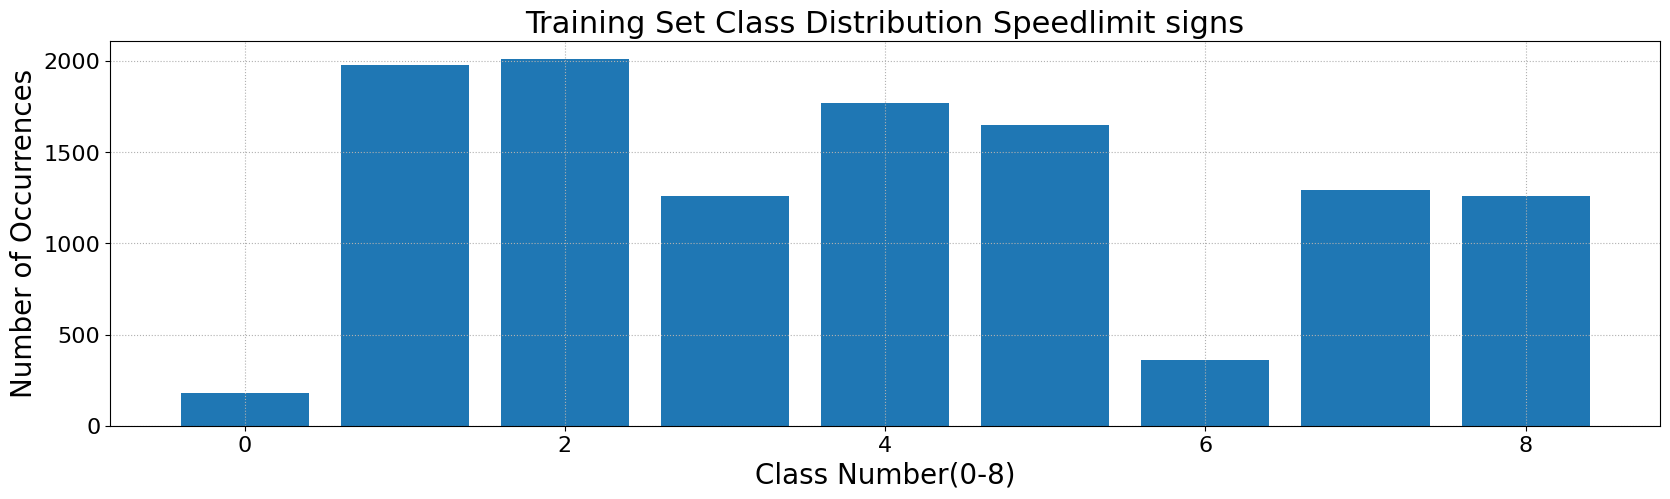

In [10]:
print("Step 5.1")
print("Comparing occurences of each class in the training dataset")
# Plot to show frequencies of data for Training dataset
plt = make_plt(speedsign_y_train, 'Class Number(0-8)', 'Number of Occurrences', 'Training Set Class Distribution Speedlimit signs')
plt.savefig('./Images/04_graph_distribution_speedlimitsigns_only_train.png')
plt.show()

Step 5.2
Comparing occurences of each class in the test dataset


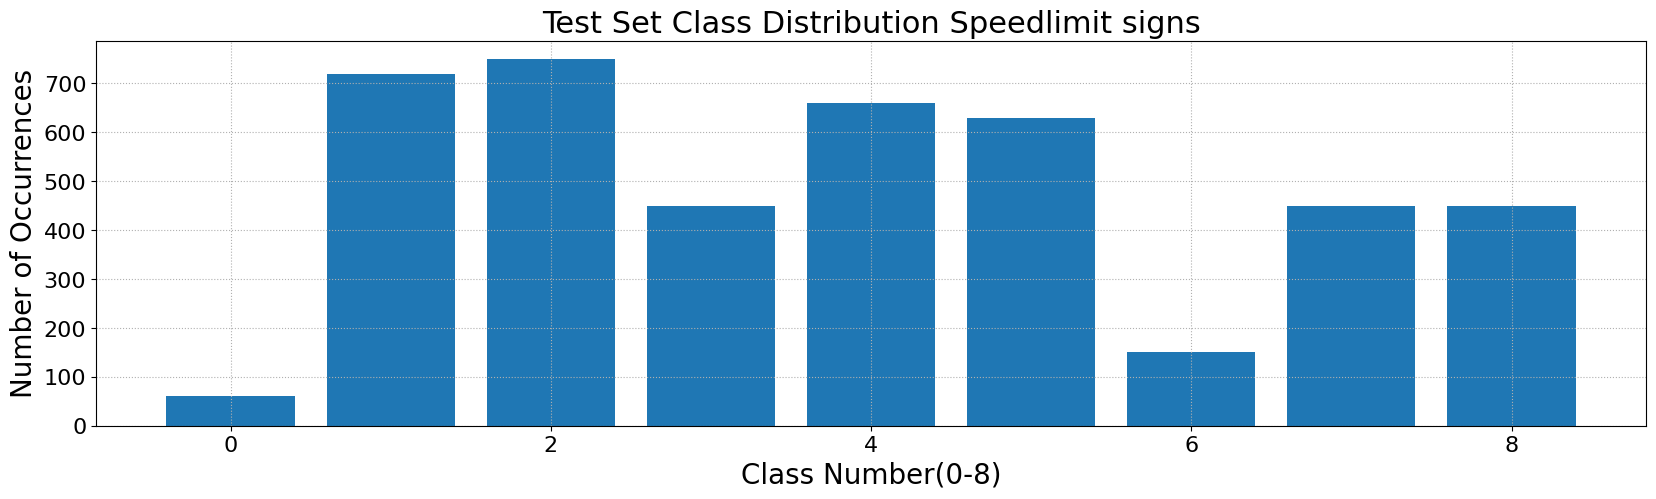

In [11]:
print("Step 5.2")
print("Comparing occurences of each class in the test dataset")
# Plot to show frequencies of data for Test dataset
plt = make_plt(speedsign_y_test, 'Class Number(0-8)', 'Number of Occurrences', 'Test Set Class Distribution Speedlimit signs')
plt.savefig('./Images/04_graph_distribution_speedlimitsigns_only_test.png')
plt.show()

Step 6.1
Comparing speedlimit signs vs. the rest
The training dataset contains 9 Speedlimit sign classes
The training dataset contains 33 other sign classes


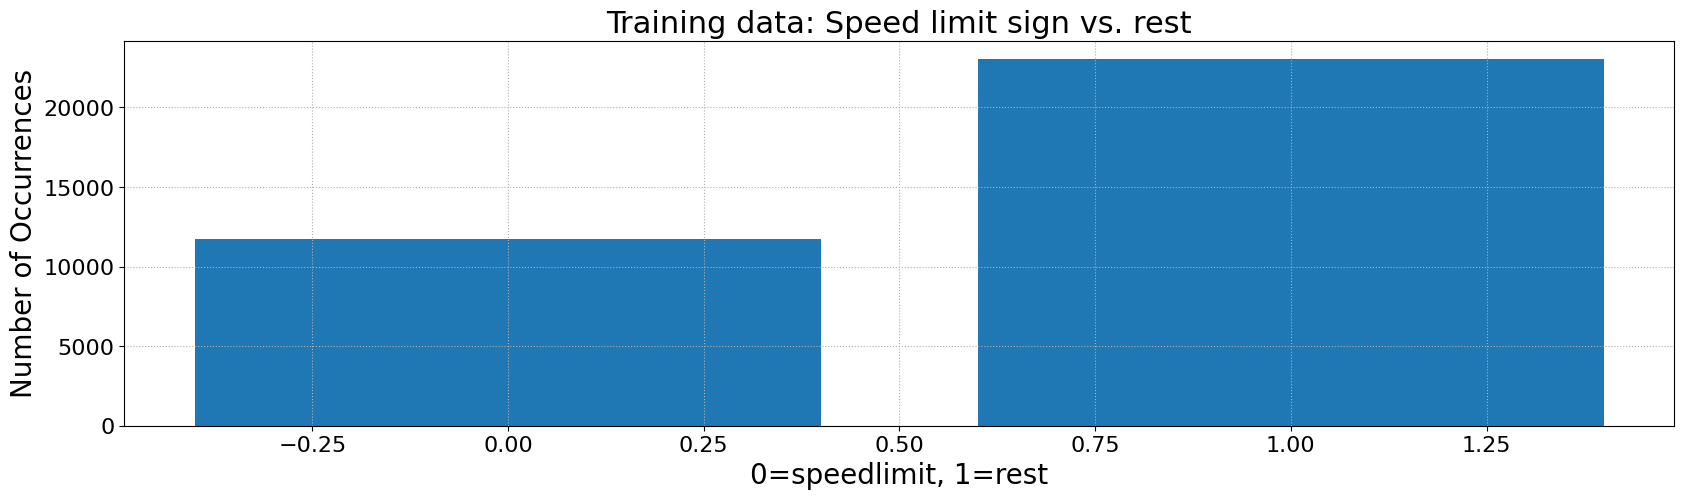

In [12]:
custom_y_train = y_train
print("Step 6.1")
print("Comparing speedlimit signs vs. the rest")
print("The training dataset contains 9 Speedlimit sign classes")
print("The training dataset contains 33 other sign classes")
for i in range(len(custom_y_train)):
    if 0 <= custom_y_train[i] <= 8:
        custom_y_train[i] = 0
    else:
        custom_y_train[i] = 1
plt = make_plt(custom_y_train, '0=speedlimit, 1=rest', 'Number of Occurrences', 'Training data: Speed limit sign vs. rest')
plt.savefig('./Images/03_graph_speedlimit_vs_rest_train.png')
plt.show()

Step 6.2
Comparing speedlimit signs vs. the rest
The test dataset contains 9 Speedlimit sign classes
The test dataset contains 33 other sign classes


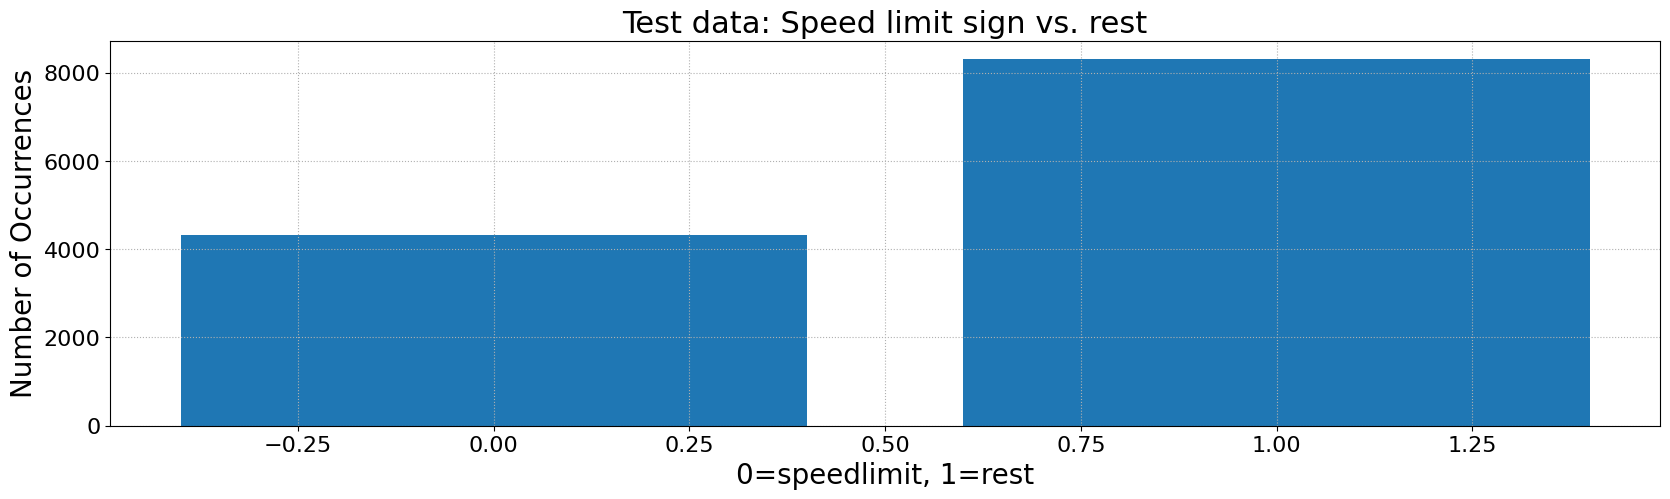

In [13]:
custom_y_test = y_test
print("Step 6.2")
print("Comparing speedlimit signs vs. the rest")
print("The test dataset contains 9 Speedlimit sign classes")
print("The test dataset contains 33 other sign classes")
for i in range(len(custom_y_test)):
    if 0 <= custom_y_test[i] <= 8:
        custom_y_test[i] = 0
    else:
        custom_y_test[i] = 1
plt = make_plt(custom_y_test, '0=speedlimit, 1=rest', 'Number of Occurrences', 'Test data: Speed limit sign vs. rest')
plt.savefig('./Images/03_graph_speedlimit_vs_rest_test.png')
plt.show()